# Import Data

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


(50000, 28, 28) (50000,)


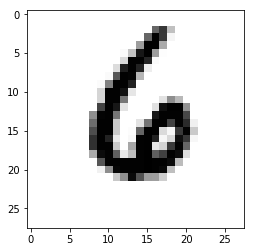

In [2]:
plt.imshow(X_train[431], cmap="Greys");

In [3]:
import tensorflow as tf
#s = tf.InteractiveSession()

In [4]:
max(y_train)

9

In [5]:
import numpy as np

# Reshape data

In [6]:
X_train_orig = X_train
Y_train_orig = y_train
X_test_orig = X_test
Y_test_orig = y_test

# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten
X_test = X_test_flatten
# Convert training and test labels to one hot matrices
with tf.Session() as s:
    Y_train = s.run(tf.one_hot(Y_train_orig, depth=10,axis=0)) 
    Y_test = s.run(tf.one_hot(Y_test_orig, depth=10,axis=0))

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (784, 50000)
Y_train shape: (10, 50000)
X_test shape: (784, 10000)
Y_test shape: (10, 10000)


# Create weight and bias variables

In [7]:

tf.set_random_seed(1)     
nW1 = 48
nW2 = 12+12
W1 = tf.get_variable("W1", [nW1,784], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#W1 = tf.get_variable("W1", [nW1,784], initializer = tf.zeros_initializer())
b1 = tf.get_variable("b1", [nW1,1], initializer = tf.zeros_initializer())
W2 = tf.get_variable("W2", [nW2,nW1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#W2 = tf.get_variable("W2", [nW2,nW1], initializer = tf.zeros_initializer())
b2 = tf.get_variable("b2", [nW2,1], initializer = tf.zeros_initializer())
W3 = tf.get_variable("W3", [10,nW2], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#W3 = tf.get_variable("W3", [10,nW2], initializer = tf.zeros_initializer())
b3 = tf.get_variable("b3", [10,1], initializer = tf.zeros_initializer())
   

In [8]:
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}


# Create X, Y, and layers

In [9]:
X = tf.placeholder(dtype=tf.float32, shape=(784,None),name = "X")
Y = tf.placeholder(dtype=tf.float32, shape=(10,None),name = "Y")


In [10]:
Z1 = tf.matmul(W1, X) + b1 
A1 = tf.nn.relu(Z1)         
Z2 = tf.matmul(W2, A1) + b2 
A2 = tf.nn.relu(Z2)         
Z3 = (tf.matmul(W3, A2) + b3)
A3 = tf.nn.sigmoid(Z3)    

# Create Cost Function

In [11]:
logits = tf.transpose(A3)
labels = tf.transpose(Y)
    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    

In [12]:
print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


# Define optimizer

In [13]:
learning_rate = init = tf.placeholder(tf.float32, shape=(), name="learning_rate") #0.0006
optimizer = tf.contrib.opt.NadamOptimizer(learning_rate = learning_rate).minimize(cost)

# Run Optimization and evaluate performance

In [14]:
init = tf.global_variables_initializer()

In [15]:
import timeit

number of minibatches: 1562
Train cost after epoch 0: 1.591276
Test cost after epoch 0: 1.521681
Train cost after epoch 1: 1.514956
Test cost after epoch 1: 1.507028
Train cost after epoch 2: 1.502586
Test cost after epoch 2: 1.500022
Train cost after epoch 3: 1.495589
Test cost after epoch 3: 1.495200
Train cost after epoch 4: 1.491137
Test cost after epoch 4: 1.491451
Train cost after epoch 5: 1.487103
Test cost after epoch 5: 1.492174
Train cost after epoch 6: 1.484932
Test cost after epoch 6: 1.489387
Train cost after epoch 7: 1.482826
Test cost after epoch 7: 1.488005
Train cost after epoch 8: 1.481057
Test cost after epoch 8: 1.487745
Train cost after epoch 9: 1.479910
Test cost after epoch 9: 1.486099
Train cost after epoch 10: 1.478291
Test cost after epoch 10: 1.486127
Train cost after epoch 11: 1.477619
Test cost after epoch 11: 1.485685
Train cost after epoch 12: 1.476770
Test cost after epoch 12: 1.484320
Train cost after epoch 13: 1.476179
Test cost after epoch 13: 1.48399

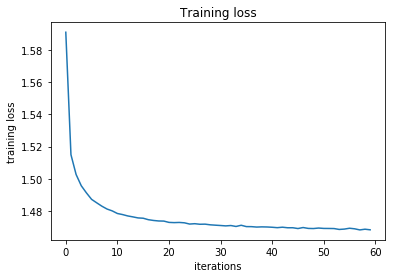

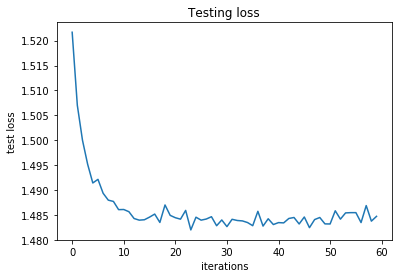

Parameters have been trained!
Train Accuracy: 0.99284
Test Accuracy: 0.9752
Elapsed time: 3.466262 minutes


In [16]:
tic = timeit.default_timer()
num_epochs = 60
minibatch_size = 32
lr0 = (12e-4)
tf.set_random_seed(1)              
seed = 3                           
(n_x, m) = X_train.shape           
n_y = Y_train.shape[0]             
costs = []
test_cost = []
num_minibatches = int(m / minibatch_size)
with tf.Session() as s:
    s.run(init)
    print("number of minibatches: %i" % num_minibatches)
    for epoch in range(num_epochs):
                indices = np.arange(m)
                seed = seed + 1
                np.random.seed(seed)   
                tf.set_random_seed(seed)              
                np.random.shuffle(indices)    
                lr = lr0 - (epoch/num_epochs)*lr0*0.9
                #print(lr)


                epoch_cost = 0.                       # Defines a cost related to an epoch


                for minibatch in range(num_minibatches):

                    # Select a minibatch
                    indxx = indices[(minibatch*minibatch_size):((minibatch+1)*minibatch_size)]
                    #print("Min index: %i, Max index %i"%(min(indxx),max(indxx)))
                    minibatch_X = X_train[:,indxx]
                    minibatch_Y = Y_train[:,indxx]

                    _ , minibatch_cost = s.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y,learning_rate:lr0})

                    epoch_cost += minibatch_cost / num_minibatches

                testcost = s.run(cost, feed_dict={X: X_test, Y: Y_test})
                test_cost.append(testcost)
                print ("Train cost after epoch %i: %f" % (epoch, epoch_cost))
                print ("Test cost after epoch %i: %f" % (epoch, testcost))

                costs.append(epoch_cost)

            # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('training loss')
    plt.xlabel('iterations')
    plt.title("Training loss")
    plt.show()
    
    plt.plot(np.squeeze(test_cost))
    plt.ylabel('test loss')
    plt.xlabel('iterations')
    plt.title("Testing loss")
    plt.show()



    #parameters = s.run(parameters)
    print ("Parameters have been trained!")

    toc = timeit.default_timer()
            # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(A3), tf.argmax(Y))

            # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
    print ("Train Accuracy:", train_accuracy)
    print ("Test Accuracy:", test_accuracy)
    print("Elapsed time: %f minutes" % ((toc-tic)/60))


# Plot results

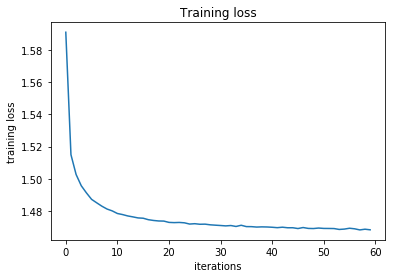

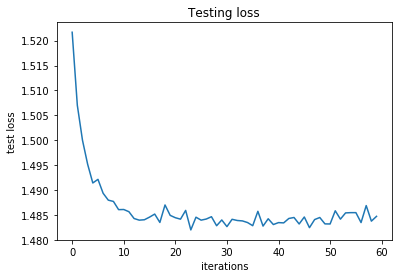

In [17]:
plt.plot(np.squeeze(costs))
plt.ylabel('training loss')
plt.xlabel('iterations')
plt.title("Training loss")
plt.show()
    
plt.plot(np.squeeze(test_cost))
plt.ylabel('test loss')
plt.xlabel('iterations')
plt.title("Testing loss")
plt.show()



# Elapsed time

In [18]:
print("Elapsed time: %f minutes" % ((toc-tic)/60))

Elapsed time: 3.466262 minutes


In [19]:
print ("Train Accuracy:", train_accuracy)
print ("Test Accuracy:", test_accuracy)
    

Train Accuracy: 0.99284
Test Accuracy: 0.9752
